In [1]:
import emip_toolkit as tk
import os
import pandas as pd
import draw_box as db
from PIL import Image, ImageDraw, ImageEnhance, ImageFont
from tkinter import Tk
from matplotlib import pyplot as plt
import numpy as np
import csv
import pytesseract

In [2]:
image = "002-AI-261997-2648858.jpg"

#### Read in dataframe

In [3]:
data_csv = os.path.normpath(os.getcwd() + os.sep + os.pardir) + "/Data/" + "002-AI-261997-2648858.csv"
test_df = pd.read_csv(data_csv, skiprows = 1)
test_df.head()

,Unnamed: 0,time_stamp,eye_event,x_cord,y_cord,duration,pupil,x1_cord,y1_cord,amplitude
0,1401,1165041,saccade,525.9,435.1,19,NaN,600.0,454.6,1.29
1,1402,1165060,fixation,591.4,455.5,365,2544.0,NaN,NaN,NaN
2,1403,1165425,saccade,591.0,454.2,17,NaN,516.4,446.6,1.26
3,1404,1165442,fixation,519.3,448.0,368,2535.0,NaN,NaN,NaN
4,1405,1165810,saccade,524.8,452.7,15,NaN,584.6,460.7,1.01


#### Identify the coordinates of AOI

In [4]:
#read the first line of data csv, which indicates the coordinates of the AOI
with open(data_csv, newline='') as f:
  reader = csv.reader(f)
  AOI_coordinates = next(reader)
left = int(float(AOI_coordinates[0]))
top = int(float(AOI_coordinates[1]))
right = int(float(AOI_coordinates[2]))
bottom = int(float(AOI_coordinates[3]))

#### Testing vscode_find_aoi

In [5]:
aoi = tk.vscode_find_aoi(image = image, left = left , top = top, right = right, bottom = bottom,\
                         margin_height=4, margin_width=13, AI_suggestions=True)
aoi.head()

,kind,name,x,y,width,height,image
0,sub-line,line 1 part 1,300.5,346,49,29,C:\Users\PC\Desktop\Copy of Saki's results/Dat...
1,sub-line,line 1 part 2,354.5,346,21,29,C:\Users\PC\Desktop\Copy of Saki's results/Dat...
2,sub-line,line 1 part 3,381.5,346,34,29,C:\Users\PC\Desktop\Copy of Saki's results/Dat...
3,sub-line,line 1 part 4,420.5,346,124,29,C:\Users\PC\Desktop\Copy of Saki's results/Dat...
4,sub-line,line 1 part 5,552.5,346,45,29,C:\Users\PC\Desktop\Copy of Saki's results/Dat...


#### Testing vscode_draw_aoi

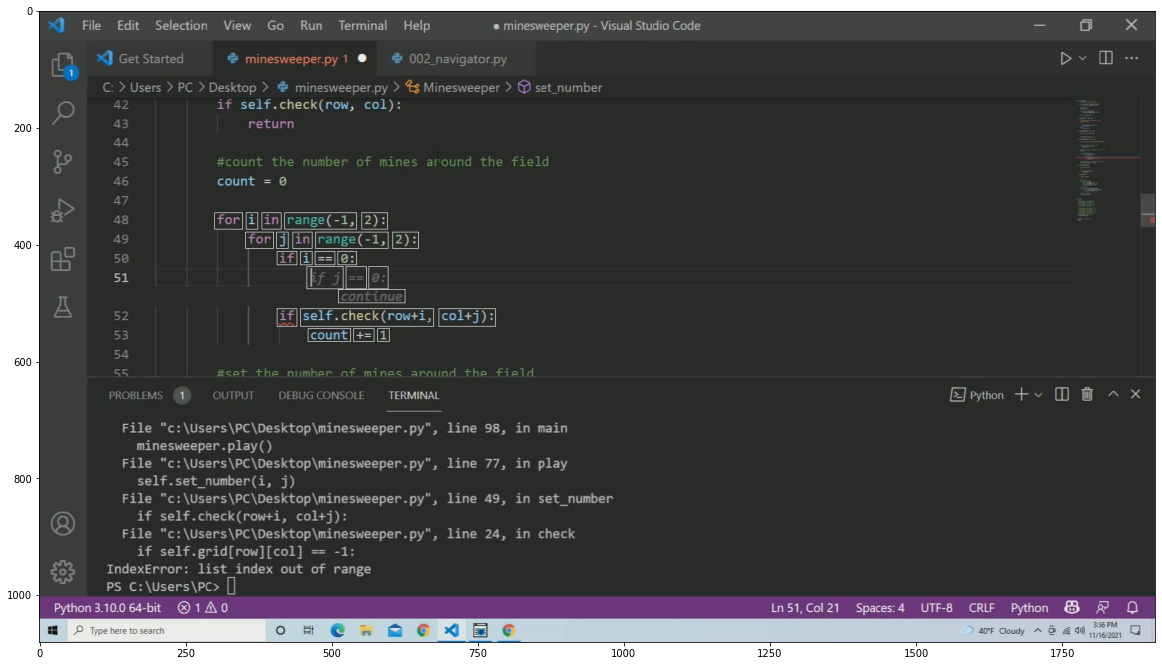

In [6]:
aoi_image = tk.vscode_draw_aoi(aoi, image, os.path.normpath(os.getcwd() + os.sep + os.pardir) + "/Data/")

fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(aoi_image)
plt.show()

#### Using pytesseract to identify tokens in the AOI

In [7]:
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [8]:
#include cropping image inside image to text
texts = tk.image_to_text(image, left = left , top = top, right = right, bottom = bottom)

In [9]:
texts

['for i in range(-1, 2):',
 'for j in range(-1, 2):',
 '| ae eS',
 'continue',
 'if self.check(row+i, col+j):',
 'count += 1']

#### Modify the tokens manually

In [10]:
texts = ['for i in range(-1, 2):',
 'for j in range(-1, 2):',
 'if i == 0',
 'if j == 0',
 'continue',
 'if self.check(row+i, col+j):',
 'count += 1']

#### Add tokens to the dataframe

In [11]:
aoi_tokens = tk.add_tokens(aoi, texts)
aoi_tokens.head(aoi_tokens.shape[0])

,kind,name,x,y,width,height,image,token
0,sub-line,line 1 part 1,300.5,346,49,29,C:\Users\PC\Desktop\Copy of Saki's results/Dat...,for
1,sub-line,line 1 part 2,354.5,346,21,29,C:\Users\PC\Desktop\Copy of Saki's results/Dat...,i
2,sub-line,line 1 part 3,381.5,346,34,29,C:\Users\PC\Desktop\Copy of Saki's results/Dat...,in
3,sub-line,line 1 part 4,420.5,346,124,29,C:\Users\PC\Desktop\Copy of Saki's results/Dat...,"range(-1,"
4,sub-line,line 1 part 5,552.5,346,45,29,C:\Users\PC\Desktop\Copy of Saki's results/Dat...,2):
5,sub-line,line 2 part 1,353.5,379,49,29,C:\Users\PC\Desktop\Copy of Saki's results/Dat...,for
6,sub-line,line 2 part 2,406.5,379,21,29,C:\Users\PC\Desktop\Copy of Saki's results/Dat...,j
7,sub-line,line 2 part 3,434.5,379,34,29,C:\Users\PC\Desktop\Copy of Saki's results/Dat...,in
8,sub-line,line 2 part 4,473.5,379,125,29,C:\Users\PC\Desktop\Copy of Saki's results/Dat...,"range(-1,"
9,sub-line,line 2 part 5,605.5,379,45,29,C:\Users\PC\Desktop\Copy of Saki's results/Dat...,2):


# fixation stuff:

In [12]:
test_df.head()

,Unnamed: 0,time_stamp,eye_event,x_cord,y_cord,duration,pupil,x1_cord,y1_cord,amplitude
0,1401,1165041,saccade,525.9,435.1,19,NaN,600.0,454.6,1.29
1,1402,1165060,fixation,591.4,455.5,365,2544.0,NaN,NaN,NaN
2,1403,1165425,saccade,591.0,454.2,17,NaN,516.4,446.6,1.26
3,1404,1165442,fixation,519.3,448.0,368,2535.0,NaN,NaN,NaN
4,1405,1165810,saccade,524.8,452.7,15,NaN,584.6,460.7,1.01


In [13]:
fixations = tk.gather_fixations(test_df)

In [14]:
tk.fixation_offset(-20, 0, fixations)

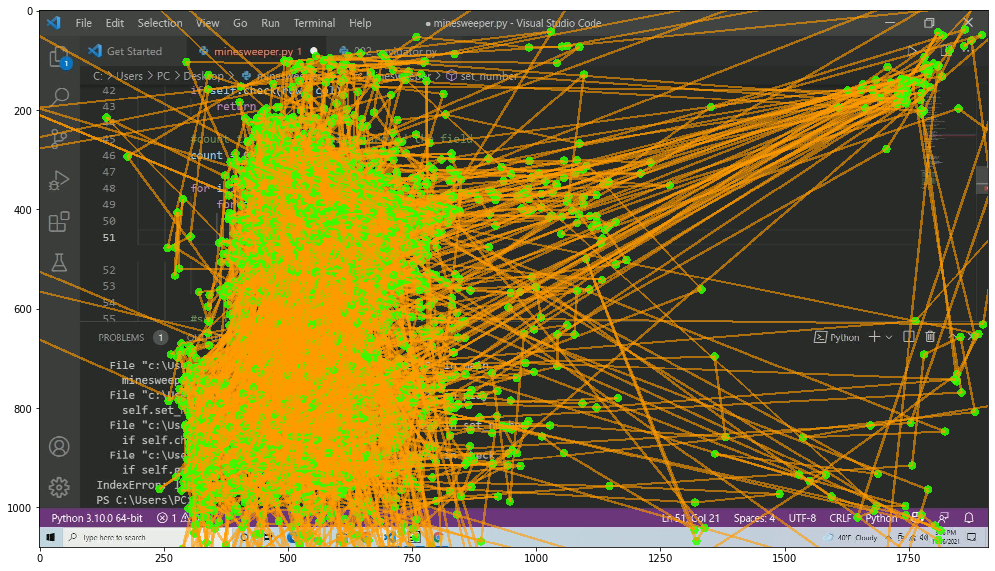

In [15]:
tk.draw_fixation(image, fixations)

In [16]:
tk.hit_test(fixations, aoi_tokens)

all fixations: 4288


,duration,x_cord,y_cord,aoi_x,aoi_y,aoi_width,aoi_height,token
0,365,571.4,455.5,564.5,438,34,39,==
1,368,499.3,448.0,458.5,438,63,39,if
2,547,561.3,460.2,525.5,438,36,39,j
3,547,561.3,460.2,564.5,438,34,39,==
4,95,492.0,341.3,420.5,346,124,29,"range(-1,"
...,...,...,...,...,...,...,...,...
1390,135,630.5,510.4,447.5,510,229,31,"self.check(row+i,"
1391,251,581.8,430.4,564.5,438,34,39,==
1392,215,592.1,434.0,564.5,438,34,39,==
1393,248,582.9,434.3,564.5,438,34,39,==
